# Clustering Neighborhood of Toronto based on Food diversity

This notebook looks into using various Python based libraries to build a machine learning model capable of clusering the neighborhood of Toronto based
on the diversity in food.

Approach:
1. Problem Definition
2. Data
3. Methodology
4. Data Analysis and Modelling
5. Results

## 1. Problem Definition

In a statement,
> Given neighborhood details of the city of Toronto such as different venues, category of the venues can we cluster the neighborhoods 
based on the city's food diversity?

**Audience/ stakeholders who might be interested in this project:**
Food plays a major role in sorting out various people/cultures within a city as people prefer various cuisines based on their culture and ethnicity.
So this project can be used by various culture based vendors to start a new business based on the cultural preference in a specific neighborhood.
Also someone who is looking to open a new restaurant in the neighborhoods of Toronto can use this analysis or model to understand the food preferences.

## 2. Data

### Neighborhood details of Toronto

The data set consists of the list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario. Only the first three characters are listed, corresponding to the Forward Sortation Area.

The data set used for the below problem is available in wikipedia.https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

**Features:**

Postal Code - Postal code of the Neighborhood.

Borough - Borough to which the neighborhood belongs.

Neighborhood - Name of the Neighborhood

### Geographical Coordinates

Inorder to explore the nighborhoods using the Foursquare API, we need the geographical coordinates of neighborhoods.
This data is available in https://cocl.us/Geospatial_data.

### Foursquare API

After retrieving the data set from wikipedia and formatted it, we will be using the Foursquare (location data provider) API to explore each nighborhoods and cluster them based on the food pracices/diversity.

**Some of the features retrieved using Foursquare API:**

Categories - Category of the venue

Category ID - unique ID for the category

Name - Name of the venue and so on.

## 3. Methodology

### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

#import beautiful soup for web scraping
from urllib.request import urlopen
from bs4 import BeautifulSoup

# import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

import json
import requests
from pandas.io.json import json_normalize

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

### Web scraping using Beautiful soup

In [3]:
# Defining the url and pass it to urlopen
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urlopen(url)

# Create a Beautiful soup object from html
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
# save the rows of the table from the wikipedia page
rows = soup.find_all("tr")

# iterate through the rows and save it to a new list
list_rows = []
for row in rows:
    str_cells = str(row)
    clean_text = BeautifulSoup(str_cells, 'lxml').get_text()
    list_rows.append(clean_text)

### create a new dataframe and clean it using Pandas

In [5]:
df = pd.DataFrame(list_rows)
df.head()

,0
0,\nPostal Code\n\nBorough\n\nNeighborhood\n
1,\nM1A\n\nNot assigned\n\nNot assigned\n
2,\nM2A\n\nNot assigned\n\nNot assigned\n
3,\nM3A\n\nNorth York\n\nParkwoods\n
4,\nM4A\n\nNorth York\n\nVictoria Village\n


In [6]:
df = df[0].str.split('\n', expand = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,,Postal Code,,Borough,,Neighborhood,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,M1A,,Not assigned,,Not assigned,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,,M2A,,Not assigned,,Not assigned,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,,M3A,,North York,,Parkwoods,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,M4A,,North York,,Victoria Village,,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
# Drop the unnecessary columns
df = df.iloc[:,:6]

In [8]:
# assign the first row as the column header
header = df.iloc[0]
df = df.iloc[1:]
df.columns = header
df.head()

,,Postal Code,,Borough,,Neighborhood
1,,M1A,,Not assigned,,Not assigned
2,,M2A,,Not assigned,,Not assigned
3,,M3A,,North York,,Parkwoods
4,,M4A,,North York,,Victoria Village
5,,M5A,,Downtown Toronto,,"Regent Park, Harbourfront"


In [9]:
df.drop([''], axis=1, inplace = True)
df.head()

,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [10]:
# Dropping the rows with Boroughs as not assigned
df = df[df["Borough"] != "Not assigned"]
df.head()

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [11]:
# Resetting the index
df.set_index(np.arange(0,len(df)), inplace=True)
df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [12]:
df.tail()

,Postal Code,Borough,Neighborhood
102,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."
103,,Canadian postal codes,
104,,,
105,NL,NS,PE
106,A,B,C


In [13]:
# Dropping the unnecessary rows at the end
df.drop(df.tail(4).index, inplace=True)
df.tail()

,Postal Code,Borough,Neighborhood
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
102,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [14]:
df.shape

(103, 3)

### Adding the coordinates and creating a new dataframe

In [15]:
coordinates = pd.read_csv("https://cocl.us/Geospatial_data")
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
df_coordinates = pd.merge(df, coordinates, on="Postal Code")
df_coordinates.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### create a map of Toronto with neighborhoods

In [17]:
# create a map of Toronto
latitude = 43.6532
longitude = -79.3832
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

#add neighborhoods
for lat, long, borough, neighborhood in zip(df_coordinates["Latitude"], df_coordinates["Longitude"], df_coordinates["Borough"], df_coordinates["Neighborhood"]):
    label = "{},{}".format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,long],
                        radius=5,
                        popup=label,
                        color="blue",
                        fill=True,
                        fill_color="#3186cc",
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_toronto)
map_toronto
    

### Define Foursquare credentials

In [18]:
CLIENT_ID = 'U3VIHO2TO5QJCKVIC2VHXKWASY4SF1JK1S5NTKVZTTLVQNFL' 
CLIENT_SECRET = 'ZC121BB5ZDKQXFF5VUXDD3HDDDRO5IPIA3V5PVKHIB4WIM0K' 
VERSION = '20180605' 

In [19]:
# retrieve the foursquare categories
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [20]:
category_results

{'meta': {'code': 200, 'requestId': '5ed9dcc2c546f3001bcbefb7'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [21]:
category_list = category_results["response"]["categories"]
len(category_list)

10

**Retrieve the category id for food**

In [22]:
for data in category_list:
    if data["name"] == "Food":
        print(data["id"], data["name"])
        food_id = data["id"]
        print(food_id)

4d4b7105d754a06374d81259 Food
4d4b7105d754a06374d81259


In [23]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [24]:
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = food_id)

In [25]:
category_dict

{'4d4b7105d754a06374d81259': 'Food',
 '503288ae91d4c4b30a586d67': 'Afghan Restaurant',
 '4bf58dd8d48988d1c8941735': 'African Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d14e941735': 'American Restaurant',
 '4bf58dd8d48988d157941735': 'New American Restaurant',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '56aa371be4b08b9a8d573568': 'Burmese Restaurant',
 '52e81612bcbc57f1066b7a03': 'Cambodian Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Restaurant',
 '52af3a5e3cf9994f4e043bea': 'Anhui Restaurant',
 '52af3a723cf9994f4e043bec': 'Beijing Restaurant',
 '52af3a7c3cf9994f4e043bed': 'Cantonese Restaurant',
 '58daa1558bbb0b01f18ec1d3': 'Cha Chaan Teng',
 '52af3a673cf9994f4e043beb': 'Chinese Aristocrat Restaurant',
 '52af3a903cf9994f4e043bee': 'Chinese Breakfast Place',
 '4bf58dd8d48988d1f5931735': 'Dim Sum Restaurant',
 '52af3a9f3cf9994f4e043bef': 'Dongbei Restaurant',
 '52af3aaa3cf9994f4e043bf0': 'Fujian Restaurant',
 '52af3ab53cf9994f4e043bf1'

### Create a function to list the top 500 venues within radius of 1000

In [78]:
LIMIT=500
def get_nearby_venues(names, latitudes, longitudes, radius=1000):
    not_found=0
    venues_list=[]
    for name, lat, long in zip(names, latitudes, longitudes):
        url = "https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius,
            food_id,
            LIMIT)
        
        
        results = requests.get(url).json()["response"]["venues"]
        
        for v in results:
            if v.get("categories") != []:
                venues_list.append([(
                    name,
                    lat,
                    long,
                    v["name"],
                    v["location"]["lat"],
                    v["location"]["lng"],
                    v["categories"][0]["name"])])
            
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Neighborhood",
                             "Neighborhood Latitude",
                             "Neighborhood Longitude",
                             "Venue",
                             "Venue Latitude",
                             "Venue Longitude",
                             "Venue Category"]
    return(nearby_venues)

In [79]:
toronto_venues = get_nearby_venues(df_coordinates["Neighborhood"], df_coordinates["Latitude"], df_coordinates["Longitude"])


In [80]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Subway,43.760334,-79.326906,Sandwich Place
2,Parkwoods,43.753259,-79.329656,Allwyn's,43.761000,-79.325478,Caribbean Restaurant
3,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant
4,Parkwoods,43.753259,-79.329656,Joey,43.753441,-79.321640,Burger Joint


## 4. Modelling

In [81]:
# Now we have created a dataframe, let's check the size
toronto_venues.shape

(4272, 7)

In [82]:
# Print the unique categories
print("There are {} unique categories".format(len(toronto_venues["Venue Category"].unique())))

There are 153 unique categories


In [83]:
# count the numnber of venues per category
toronto_venues.groupby("Venue Category")["Venue Category"].count().sort_values(ascending = False)

Venue Category
Coffee Shop                  607
Pizza Place                  249
Café                         209
Bakery                       208
Restaurant                   189
Fast Food Restaurant         166
Chinese Restaurant           152
Sandwich Place               136
Italian Restaurant           136
Indian Restaurant             98
Caribbean Restaurant          97
Sushi Restaurant              94
Grocery Store                 79
Asian Restaurant              78
Ice Cream Shop                73
Burger Joint                  68
Fried Chicken Joint           68
Bubble Tea Shop               67
Thai Restaurant               60
Middle Eastern Restaurant     60
Japanese Restaurant           58
Breakfast Spot                56
Vietnamese Restaurant         54
Dessert Shop                  50
BBQ Joint                     49
Food Court                    48
American Restaurant           45
Deli / Bodega                 43
Korean Restaurant             40
Mexican Restaurant          

 **Let's remove the generalized venues such as coffee shop as we are goint to explore the diversity in food practice**

In [84]:
unique_categories = toronto_venues["Venue Category"].unique().tolist()
print(','.join(str(x) for x in unique_categories))

Caribbean Restaurant,Sandwich Place,Fast Food Restaurant,Burger Joint,Café,Fish & Chips Shop,Bakery,Fried Chicken Joint,Chinese Restaurant,Coffee Shop,Pizza Place,Grocery Store,French Restaurant,Food,Event Space,Food Stand,Portuguese Restaurant,Thai Restaurant,Food Court,Indian Restaurant,Deli / Bodega,American Restaurant,Middle Eastern Restaurant,Asian Restaurant,Mediterranean Restaurant,German Restaurant,Ice Cream Shop,Factory,Food Truck,Gourmet Shop,Sushi Restaurant,Bubble Tea Shop,Breakfast Spot,Italian Restaurant,Pub,Restaurant,Burrito Place,Diner,Brewery,Gastropub,Poutine Place,Seafood Restaurant,Hot Dog Joint,Mexican Restaurant,Salad Place,Dessert Shop,Korean Restaurant,BBQ Joint,New American Restaurant,Bowling Alley,Tea Room,Noodle House,Vietnamese Restaurant,Ramen Restaurant,Poke Place,Supermarket,Halal Restaurant,Japanese Restaurant,Cupcake Shop,African Restaurant,Greek Restaurant,Filipino Restaurant,Cafeteria,Bar,Bagel Shop,Wings Joint,Office,Snack Place,Convenience Store,Ve

In [120]:
# create a list of general categories
general_categories = ["Sandwich Place", "Burger Joint", "Café", "Bakery", "Fried Chicken Joint", "Coffee Shop", "Grocery Store", "Food", "Event Space", "Food Stand", "Food Court", "Ice Cream Shop", "Factory",
                      "Food Truck", "Gourmet Shop", "Sushi Restaurant", "Bubble Tea Shop", "Breakfast Spot", "Pub", "Restaurant", "Dinner", "Poutine Place", "Seafood Restaurant", "Hot Dog Joint", "Salad Place",
                      "Dessert Shop", "BBQ Joint", "Bowling Alley", "Tea Room", "Noodle House", "Poke Place", "Supermarket", "Cupcake Shop", "Cafeteria", "Wings Joint", "Office", "Snack Place", "Convenience Store",
                      "Vegetarian / Vegan Restaurant", "Steakhouse", "Juice Bar", "Donut Shop", "Dim Sum Restaurant", "Pastry Shop", "Frozen Yogurt Shop", "Mac & Cheese Joint", "Shawarma Place", "Sports Bar", 
                      "Beach", "Market", "Taco Place", "Comfort Food Restaurant", "Hotpot Restaurant", "Doner Restaurant", "Beer Bar", "Bike Shop", "Hotel", "Buffet", "Kebab Restaurant", "Bistro", "Butcher", 
                      "Sake Bar", "Smoothie Shop", "Pide Place", "Dumpling Restaurant", "Creperie", "Food & Drink Shop", "Gaming Cafe", "Jazz Club", "Lounge", "Wine Bar", "Shpping Mall", "Pie Shop", "Food Service",
                      "Udon Restaurant", "Polish Restaurant", "Pizza Place", "Diner"]

In [121]:
# list the unique food categories
required_categories = list(set(unique_categories) - set(general_categories))

In [122]:
toronto_venues = toronto_venues[toronto_venues["Venue Category"].isin(required_categories)].reset_index(drop=True)

In [123]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Allwyn's,43.761000,-79.325478,Caribbean Restaurant
2,Parkwoods,43.753259,-79.329656,A&W,43.760643,-79.326865,Fast Food Restaurant
3,Parkwoods,43.753259,-79.329656,High Street Fish & Chips,43.745260,-79.324949,Fish & Chips Shop
4,Parkwoods,43.753259,-79.329656,Spicy Chicken House,43.760639,-79.325671,Chinese Restaurant


In [124]:
# Print the unique food categories again
print("There are {} unique food categoreis".format(len(toronto_venues["Venue Category"].unique())))

There are 77 unique food categoreis


**Analyze each neighborhood basd on the food category**

In [125]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues["Venue Category"])
toronto_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bagel Shop,Bar,Brazilian Restaurant,Brewery,Burmese Restaurant,...,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Yemeni Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# add neighborhood column
Neighborhood = toronto_venues["Neighborhood"]
toronto_onehot.insert(0, "Neighborhood", Neighborhood)
toronto_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bagel Shop,Bar,Brazilian Restaurant,Brewery,...,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Yemeni Restaurant
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
toronto_onehot.shape

(1595, 78)

In [128]:
# create a new dataframe with number of venues per neighborhood
neighborhood_counts = toronto_onehot.groupby("Neighborhood").sum()
neighborhood_counts.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bagel Shop,Bar,Brazilian Restaurant,Brewery,Burmese Restaurant,...,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Yemeni Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Agincourt,0,0,1,0,1,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0
"Alderwood, Long Branch",0,0,1,0,2,0,0,0,0,1,...,0,0,0,0,2,0,1,0,0,0
"Bathurst Manor, Wilson Heights, Downsview North",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bayview Village,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Bedford Park, Lawrence Manor East",0,0,2,0,1,2,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


**create a new dataframe by grouping the neighborhoods by the frequence of occurrence**

In [129]:
toronto_grouped = toronto_onehot.groupby("Neighborhood").mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Bagel Shop,Bar,Brazilian Restaurant,Brewery,...,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Yemeni Restaurant
0,Agincourt,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.066667,0.0,0.0,0.000,0.0,0.0000,0.033333,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.062500,0.0,0.125000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.125,0.0,0.0625,0.000000,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.100000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000,0.0,0.0000,0.000000,0.0,0.0
3,Bayview Village,0.0,0.0,0.000000,0.0,0.285714,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000,0.0,0.0000,0.000000,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.100000,0.0,0.050000,0.1,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.100,0.0,0.0000,0.000000,0.0,0.0


**create a function to sort the values in descending order**

In [130]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

**create a new dataframe with top 5 venues for each neighborhood**

In [131]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']
columns = ["Neighborhood"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most common venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most common venue".format(ind+1))

In [132]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

In [133]:
for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue
0,Agincourt,Chinese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Caribbean Restaurant,Japanese Restaurant
1,"Alderwood, Long Branch",Italian Restaurant,Asian Restaurant,Thai Restaurant,Hungarian Restaurant,Deli / Bodega
2,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Fast Food Restaurant,American Restaurant,Deli / Bodega,Japanese Restaurant
3,Bayview Village,Asian Restaurant,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant
4,"Bedford Park, Lawrence Manor East",Fast Food Restaurant,American Restaurant,Thai Restaurant,Bagel Shop,Italian Restaurant


### Cluster the nighborhoods using K means

In [135]:
toronto_clustering = toronto_grouped.drop("Neighborhood", axis = 1)

**Using the elbow method to sort the K value**

In [137]:
from sklearn.cluster import KMeans
cluster_distance = []
for k in range(1,30):
    kmeans = KMeans(n_clusters=k).fit(toronto_clustering)
    cluster_distance.append(kmeans.inertia_)
cluster_distance

[10.489507117814451,
 9.5707611171093,
 8.703507079637397,
 8.10136354032968,
 7.503980845664528,
 7.170595034624943,
 6.830445727198631,
 6.501047433766376,
 6.122797163087844,
 5.864322832695479,
 5.67926843306047,
 5.437891764685856,
 5.170063847200122,
 5.025484449286515,
 4.853638509276572,
 4.624305599820525,
 4.557624479105209,
 4.324573955021492,
 4.324777925800739,
 4.089061839117299,
 3.9574782140070597,
 3.924147511859203,
 3.778092384211706,
 3.6545598592065667,
 3.5582285438723185,
 3.3961420858940254,
 3.32573167671949,
 3.2311002894093566,
 3.1104580408843105]

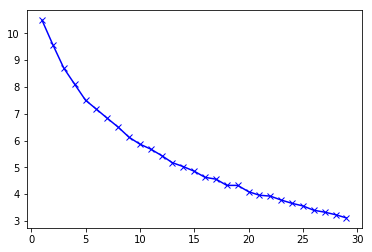

In [140]:
fig, ax = plt.subplots()
k = range(1,30)
ax.plot(k, cluster_distance, 'bx-');


**we will select the clusters as 8**

In [143]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(toronto_clustering)


In [144]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue
0,Agincourt,Chinese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Caribbean Restaurant,Japanese Restaurant
1,"Alderwood, Long Branch",Italian Restaurant,Asian Restaurant,Thai Restaurant,Hungarian Restaurant,Deli / Bodega
2,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Fast Food Restaurant,American Restaurant,Deli / Bodega,Japanese Restaurant
3,Bayview Village,Asian Restaurant,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant
4,"Bedford Park, Lawrence Manor East",Fast Food Restaurant,American Restaurant,Thai Restaurant,Bagel Shop,Italian Restaurant


In [145]:
#Add cluster labels 
neighborhoods_venues_sorted.insert(0, "Cluster Labels", kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue
0,4,Agincourt,Chinese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Caribbean Restaurant,Japanese Restaurant
1,0,"Alderwood, Long Branch",Italian Restaurant,Asian Restaurant,Thai Restaurant,Hungarian Restaurant,Deli / Bodega
2,5,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Fast Food Restaurant,American Restaurant,Deli / Bodega,Japanese Restaurant
3,5,Bayview Village,Asian Restaurant,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant
4,1,"Bedford Park, Lawrence Manor East",Fast Food Restaurant,American Restaurant,Thai Restaurant,Bagel Shop,Italian Restaurant


In [146]:
#Add lat and long by merging the dataframes
toronto_merged = neighborhoods_venues_sorted.join(df_coordinates.set_index("Neighborhood"), on = "Neighborhood")
toronto_merged.head()

,Cluster Labels,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
0,4,Agincourt,Chinese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Caribbean Restaurant,Japanese Restaurant,M1S,Scarborough,43.794200,-79.262029
1,0,"Alderwood, Long Branch",Italian Restaurant,Asian Restaurant,Thai Restaurant,Hungarian Restaurant,Deli / Bodega,M8W,Etobicoke,43.602414,-79.543484
2,5,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Fast Food Restaurant,American Restaurant,Deli / Bodega,Japanese Restaurant,M3H,North York,43.754328,-79.442259
3,5,Bayview Village,Asian Restaurant,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant,M2K,North York,43.786947,-79.385975
4,1,"Bedford Park, Lawrence Manor East",Fast Food Restaurant,American Restaurant,Thai Restaurant,Bagel Shop,Italian Restaurant,M5M,North York,43.733283,-79.419750


**Visualize the clusters**

In [147]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results:
**The neighborhoods of Toronto are clustered based on the food practice and the first, second and the corresponding Boroughs are displayed at the end of each cluster** 

### Cluster 0

In [164]:
cluster_0 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 0, toronto_merged.columns[1:]]
cluster_0.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
1,"Alderwood, Long Branch",Italian Restaurant,Asian Restaurant,Thai Restaurant,Hungarian Restaurant,Deli / Bodega,M8W,Etobicoke,43.602414,-79.543484
8,"Business reply mail Processing Centre, South C...",Italian Restaurant,Indian Restaurant,Latin American Restaurant,Falafel Restaurant,Fast Food Restaurant,M7Y,East Toronto,43.662744,-79.321558
14,Christie,Italian Restaurant,Korean Restaurant,Japanese Restaurant,Fast Food Restaurant,Indian Restaurant,M6G,Downtown Toronto,43.669542,-79.422564
20,Davisville North,Italian Restaurant,Fast Food Restaurant,Ramen Restaurant,Asian Restaurant,Thai Restaurant,M4P,Central Toronto,43.712751,-79.390197
22,Don Mills,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Indian Restaurant,Thai Restaurant,M3B,North York,43.745906,-79.352188


In [165]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_0[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

Central Toronto     6
Etobicoke           3
North York          3
West Toronto        2
East Toronto        2
Scarborough         1
Downtown Toronto    1
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Italian Restaurant           14
Japanese Restaurant           2
Latin American Restaurant     1
Thai Restaurant               1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Italian Restaurant             3
Mexican Restaurant             2
Fast Food Restaurant           2
Indian Restaurant              2
Asian Restaurant               2
Japanese Restaurant            1
Ramen Restaurant               1
Bagel Shop                     1
French Restaurant              1
Eastern European Restaurant    1
Deli / Bodega                  1
Korean Restaurant              1
Name: 2nd Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### Cluster 2

In [162]:
cluster_1 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 1, toronto_merged.columns[1:]]
cluster_1.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
4,"Bedford Park, Lawrence Manor East",Fast Food Restaurant,American Restaurant,Thai Restaurant,Bagel Shop,Italian Restaurant,M5M,North York,43.733283,-79.419750
6,"Birch Cliff, Cliffside West",Indian Restaurant,Thai Restaurant,Asian Restaurant,Italian Restaurant,Halal Restaurant,M1N,Scarborough,43.692657,-79.264848
11,Canada Post Gateway Processing Centre,Middle Eastern Restaurant,Indian Restaurant,Chinese Restaurant,Halal Restaurant,Greek Restaurant,M7R,Mississauga,43.636966,-79.615819
12,Cedarbrae,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,Halal Restaurant,Caribbean Restaurant,M1H,Scarborough,43.773136,-79.239476
36,"High Park, The Junction South",Thai Restaurant,Indian Restaurant,Mexican Restaurant,Gastropub,Burrito Place,M6P,West Toronto,43.661608,-79.464763


In [163]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_1[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

East York           4
Scarborough         3
West Toronto        2
North York          2
East Toronto        2
Mississauga         1
Etobicoke           1
Central Toronto     1
Downtown Toronto    1
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Indian Restaurant            6
Chinese Restaurant           3
Japanese Restaurant          2
Thai Restaurant              2
Italian Restaurant           1
Fast Food Restaurant         1
Filipino Restaurant          1
Middle Eastern Restaurant    1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Indian Restaurant       5
Fast Food Restaurant    2
Thai Restaurant         2
Chinese Restaurant      1
Afghan Restaurant       1
Irish Pub               1
American Restaurant     1
Italian Restaurant      1
Deli / Bodega           1
Caribbean Restaurant    1
Ramen Restaurant        1
Name: 2nd Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### Cluster 2

In [166]:
cluster_2 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 2, toronto_merged.columns[1:]]
cluster_2.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
5,Berczy Park,Fast Food Restaurant,Irish Pub,Burrito Place,Greek Restaurant,Middle Eastern Restaurant,M5E,Downtown Toronto,43.644771,-79.373306
7,"Brockton, Parkdale Village, Exhibition Place",Tibetan Restaurant,Fast Food Restaurant,Asian Restaurant,Burrito Place,Korean Restaurant,M6K,West Toronto,43.636847,-79.428191
13,Central Bay Street,Fast Food Restaurant,Chinese Restaurant,Gastropub,Vietnamese Restaurant,Ramen Restaurant,M5G,Downtown Toronto,43.657952,-79.387383
15,Church and Wellesley,Fast Food Restaurant,Chinese Restaurant,Gastropub,Mexican Restaurant,Vietnamese Restaurant,M4Y,Downtown Toronto,43.665860,-79.383160
16,"Clarks Corners, Tam O'Shanter, Sullivan",Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Caribbean Restaurant,Cantonese Restaurant,M1T,Scarborough,43.781638,-79.304302


In [167]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_2[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

Downtown Toronto    16
North York           3
Scarborough          2
West Toronto         2
Etobicoke            2
Central Toronto      2
East York            1
York                 1
East Toronto         1
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Fast Food Restaurant     17
Greek Restaurant          2
Brewery                   2
Mexican Restaurant        2
Irish Pub                 1
Tibetan Restaurant        1
Chinese Restaurant        1
Italian Restaurant        1
Deli / Bodega             1
Vietnamese Restaurant     1
French Restaurant         1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Fast Food Restaurant           6
Chinese Restaurant             4
Vietnamese Restaurant          3
Italian Restaurant             3
Brewery                        2
Asian Restaurant               2
Irish Pub                      2
Portuguese Restaurant          1
American Restaurant            1
Deli / Bodega                 

### Cluster 3

In [168]:
cluster_3 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 3, toronto_merged.columns[1:]]
cluster_3.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
10,Caledonia-Fairbanks,Caribbean Restaurant,Portuguese Restaurant,Mexican Restaurant,Turkish Restaurant,Thai Restaurant,M6E,York,43.689026,-79.453512
23,"Dorset Park, Wexford Heights, Scarborough Town...",Asian Restaurant,Caribbean Restaurant,Fast Food Restaurant,American Restaurant,Italian Restaurant,M1P,Scarborough,43.757410,-79.273304
24,Downsview,Vietnamese Restaurant,Chinese Restaurant,Caribbean Restaurant,Latin American Restaurant,Italian Restaurant,M3K,North York,43.737473,-79.464763
24,Downsview,Vietnamese Restaurant,Chinese Restaurant,Caribbean Restaurant,Latin American Restaurant,Italian Restaurant,M3L,North York,43.739015,-79.506944
24,Downsview,Vietnamese Restaurant,Chinese Restaurant,Caribbean Restaurant,Latin American Restaurant,Italian Restaurant,M3M,North York,43.728496,-79.495697


In [169]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_3[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

North York     7
York           4
Scarborough    3
Etobicoke      3
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Vietnamese Restaurant    5
Caribbean Restaurant     5
Fast Food Restaurant     3
African Restaurant       2
Asian Restaurant         1
Chinese Restaurant       1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Caribbean Restaurant         5
Chinese Restaurant           4
Indian Restaurant            2
Italian Restaurant           2
Portuguese Restaurant        1
African Restaurant           1
Middle Eastern Restaurant    1
Fast Food Restaurant         1
Name: 2nd Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### Cluser 4

In [170]:
cluster_4 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 4, toronto_merged.columns[1:]]
cluster_4.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
0,Agincourt,Chinese Restaurant,Szechuan Restaurant,Shanghai Restaurant,Caribbean Restaurant,Japanese Restaurant,M1S,Scarborough,43.794200,-79.262029
33,"Golden Mile, Clairlea, Oakridge",Chinese Restaurant,Indian Restaurant,Falafel Restaurant,Thai Restaurant,Fast Food Restaurant,M1L,Scarborough,43.711112,-79.284577
34,"Guildwood, Morningside, West Hill",Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Greek Restaurant,Mexican Restaurant,M1E,Scarborough,43.763573,-79.188711
43,"Kennedy Park, Ionview, East Birchmount Park",Chinese Restaurant,Caribbean Restaurant,Indian Restaurant,Filipino Restaurant,Asian Restaurant,M1K,Scarborough,43.727929,-79.262029
51,"Milliken, Agincourt North, Steeles East, L'Amo...",Chinese Restaurant,Asian Restaurant,Korean Restaurant,Vietnamese Restaurant,Ramen Restaurant,M1V,Scarborough,43.815252,-79.284577


In [171]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_4[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

Scarborough    6
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Chinese Restaurant      5
Fast Food Restaurant    1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Indian Restaurant       2
Asian Restaurant        1
Szechuan Restaurant     1
Caribbean Restaurant    1
Chinese Restaurant      1
Name: 2nd Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### cluster 5

In [172]:
cluster_5 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 5, toronto_merged.columns[1:]]
cluster_5.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
2,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Fast Food Restaurant,American Restaurant,Deli / Bodega,Japanese Restaurant,M3H,North York,43.754328,-79.442259
3,Bayview Village,Asian Restaurant,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Middle Eastern Restaurant,M2K,North York,43.786947,-79.385975
9,"CN Tower, King and Spadina, Railway Lands, Har...",American Restaurant,Chinese Restaurant,Eastern European Restaurant,Harbor / Marina,Burrito Place,M5V,Downtown Toronto,43.628947,-79.394420
27,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",Eastern European Restaurant,Mediterranean Restaurant,Scandinavian Restaurant,Thai Restaurant,Chinese Restaurant,M9C,Etobicoke,43.643515,-79.577201
37,Hillcrest Village,Chinese Restaurant,Korean Restaurant,Cantonese Restaurant,African Restaurant,Fast Food Restaurant,M2H,North York,43.803762,-79.363452


In [173]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_5[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

North York          8
Etobicoke           2
Scarborough         1
Downtown Toronto    1
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Chinese Restaurant             3
Middle Eastern Restaurant      2
Korean Restaurant              2
Asian Restaurant               1
Eastern European Restaurant    1
American Restaurant            1
Latin American Restaurant      1
Fast Food Restaurant           1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Vietnamese Restaurant        2
Chinese Restaurant           2
American Restaurant          1
Fast Food Restaurant         1
Japanese Restaurant          1
Mediterranean Restaurant     1
Middle Eastern Restaurant    1
Caribbean Restaurant         1
Korean Restaurant            1
Ramen Restaurant             1
Name: 2nd Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### Cluster 6

In [174]:
cluster_6 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 6, toronto_merged.columns[1:]]
cluster_6.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
97,"York Mills, Silver Hills",Middle Eastern Restaurant,Mediterranean Restaurant,Deli / Bodega,Egyptian Restaurant,Ethiopian Restaurant,M2L,North York,43.75749,-79.374714


In [175]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_6[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

North York    1
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Middle Eastern Restaurant    1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mediterranean Restaurant    1
Name: 2nd Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


### Cluster 7

In [176]:
cluster_7 = toronto_merged.loc[toronto_merged["Cluster Labels"] == 7, toronto_merged.columns[1:]]
cluster_7.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4th Most common venue,5th Most common venue,Postal Code,Borough,Latitude,Longitude
42,"Islington Avenue, Humber Valley Village",Fast Food Restaurant,Yemeni Restaurant,Gastropub,English Restaurant,Ethiopian Restaurant,M9A,Etobicoke,43.667856,-79.532242


In [177]:
required_columns = ["Borough","1st Most common venue", "2nd Most common venue"]
for col in required_columns:
    print(cluster_7[col].value_counts(ascending=False))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

Etobicoke    1
Name: Borough, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Fast Food Restaurant    1
Name: 1st Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Yemeni Restaurant    1
Name: 2nd Most common venue, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
